In [2]:
import warnings
from chefboost import Chefboost as chef
import pandas as pd

#Load dataset
df = pd.read_csv('D:\DAP\SP26-AI1904-DAP391m-main\SP26-AI1904-DAP391m-main\lab_part_3\lab1\lab1\dataset\golf.txt')
df.head()

<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Admin\AppData\Local\Temp\ipykernel_4900\1355687527.py:6: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('D:\DAP\SP26-AI1904-DAP391m-main\SP26-AI1904-DAP391m-main\lab_part_3\lab1\lab1\dataset\golf.txt')


,Outlook,Temp.,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [3]:

print("ID3 algorithm\n")

#set algorithm
config = {'algorithm': 'ID3'}

#train model on training dataset
print("Train model on traing dataset:")
model = chef.fit(df[:8].copy(), config)

#define x vector for given day
xrow = ['Sunny','Hot','High','Weak']

#make prediction for given day
prediction = chef.predict(model, xrow)
print("Prediction for given day. Should we play? {0}".format(prediction))

c=0
print("\nCompare predictions and expected results on TESTING dataset:")
#prediction on testing data set
for index, instance in df[8:].iterrows():
    prediction = chef.predict(model, instance)
    actual=instance['Decision']  
    print(actual,"-",prediction)
    if(actual==prediction):
        c=c+1
print("Accuracy on TESTING data set:{0}%".format(round(c/df[8:].shape[0],4) ))

ID3 algorithm

Train model on traing dataset:
26-01-19 08:33:53 - ID3 tree is going to be built...
26-01-19 08:33:53 - -------------------------
26-01-19 08:33:53 - finished in 0.17833518981933594 seconds
26-01-19 08:33:53 - -------------------------
26-01-19 08:33:53 - Evaluate train set
26-01-19 08:33:53 - -------------------------
26-01-19 08:33:53 - Accuracy: 100.0% on 8 instances
26-01-19 08:33:53 - Labels: ['No' 'Yes']
26-01-19 08:33:53 - Confusion matrix: [[4, 0], [0, 4]]
26-01-19 08:33:53 - Precision: 100.0%, Recall: 100.0%, F1: 100.0%
Prediction for given day. Should we play? No

Compare predictions and expected results on TESTING dataset:
Yes - No
Yes - Yes
Yes - No
Yes - Yes
Yes - Yes
No - No
Accuracy on TESTING data set:0.6667%


d:\DAP\SP26-AI1904-DAP391m-main\SP26-AI1904-DAP391m-main\lab_part_3\lab1\lab1\outputs\rules\rules.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[0] == 'Sunny':
d:\DAP\SP26-AI1904-DAP391m-main\SP26-AI1904-DAP391m-main\lab_part_3\lab1\lab1\outputs\rules\rules.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif obj[0] == 'Rain':
d:\DAP\SP26-AI1904-DAP391m-main\SP26-AI1904-DAP391m-main\lab_part_3\lab1\lab1\outputs\rules\rules.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

In [4]:
print("C4.5 algorithm\n")

#set algorithm
config = {'algorithm': 'C4.5'}
model = chef.fit(df[:8], config)

#define xrow
xrow  = ['Sunny','Hot','High','Weak']

#make single prediction
prediction = chef.predict(model,xrow)

#prediction on test data set
for index, instance in df[8:].iterrows():
    prediction = chef.predict(model, instance)
    actual=instance['Decision']
    
    print(actual,"-",prediction)
print("Accuracy on TESTING data set:{0}%".format(round(c/df[8:].shape[0],4) ))

C4.5 algorithm

26-01-19 08:33:53 - C4.5 tree is going to be built...
26-01-19 08:33:53 - -------------------------
26-01-19 08:33:53 - finished in 0.1849372386932373 seconds
26-01-19 08:33:53 - -------------------------
26-01-19 08:33:53 - Evaluate train set
26-01-19 08:33:53 - -------------------------
26-01-19 08:33:53 - Accuracy: 100.0% on 8 instances
26-01-19 08:33:53 - Labels: ['No' 'Yes']
26-01-19 08:33:53 - Confusion matrix: [[4, 0], [0, 4]]
26-01-19 08:33:53 - Precision: 100.0%, Recall: 100.0%, F1: 100.0%
Yes - No
Yes - Yes
Yes - No
Yes - Yes
Yes - Yes
No - No
Accuracy on TESTING data set:0.6667%


d:\DAP\SP26-AI1904-DAP391m-main\SP26-AI1904-DAP391m-main\lab_part_3\lab1\lab1\outputs\rules\rules.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[0] == 'Sunny':
d:\DAP\SP26-AI1904-DAP391m-main\SP26-AI1904-DAP391m-main\lab_part_3\lab1\lab1\outputs\rules\rules.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif obj[0] == 'Rain':
d:\DAP\SP26-AI1904-DAP391m-main\SP26-AI1904-DAP391m-main\lab_part_3\lab1\lab1\outputs\rules\rules.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

In [5]:
print("CART algorithm\n")

#set algorithm
config = {'algorithm': 'CART'}
model = chef.fit(df[:8], config)

#define single x vector
xrow = ['Sunny','Hot','High','Weak']

#make single prediction
prediction = chef.predict(model, xrow)

#prediction on test data set
print("\nCompare predictions and expected results on TESTING dataset:")
for index, instance in df[8:].iterrows():
    prediction = chef.predict(model, instance)
    actual=instance['Decision']
    
    print(actual,"-",prediction)
print("Accuracy on TESTING data set:{0}%".format(round(c/df[8:].shape[0],4) ))

CART algorithm

26-01-19 08:33:54 - CART tree is going to be built...
26-01-19 08:33:54 - -------------------------
26-01-19 08:33:54 - finished in 0.13527631759643555 seconds
26-01-19 08:33:54 - -------------------------
26-01-19 08:33:54 - Evaluate train set
26-01-19 08:33:54 - -------------------------
26-01-19 08:33:54 - Accuracy: 100.0% on 8 instances
26-01-19 08:33:54 - Labels: ['No' 'Yes']
26-01-19 08:33:54 - Confusion matrix: [[4, 0], [0, 4]]
26-01-19 08:33:54 - Precision: 100.0%, Recall: 100.0%, F1: 100.0%

Compare predictions and expected results on TESTING dataset:
Yes - No
Yes - Yes
Yes - No
Yes - Yes
Yes - Yes
No - No
Accuracy on TESTING data set:0.6667%


d:\DAP\SP26-AI1904-DAP391m-main\SP26-AI1904-DAP391m-main\lab_part_3\lab1\lab1\outputs\rules\rules.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[0] == 'Sunny':
d:\DAP\SP26-AI1904-DAP391m-main\SP26-AI1904-DAP391m-main\lab_part_3\lab1\lab1\outputs\rules\rules.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif obj[0] == 'Rain':
d:\DAP\SP26-AI1904-DAP391m-main\SP26-AI1904-DAP391m-main\lab_part_3\lab1\lab1\outputs\rules\rules.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

EXAMPLE 2


In [6]:
from chefboost import Chefboost as chef
import pandas as pd
df=pd.read_csv("dataset/iris.data")
df = df.sample(frac=1).reset_index(drop=True)
df.head()

print("ID3 algorithm\n")

#set algorithm
config = {'algorithm': 'ID3'}
model = chef.fit(df[:100].copy(), config)

#prediction on test data set
for index, instance in df[100:].iterrows():
    prediction = chef.predict(model, instance)
    actual=instance['Decision']  
    #print(actual,"-",prediction)
    
print("C4.5 algorithm\n")

#set algorithm
config = {'algorithm': 'C4.5'}
model = chef.fit(df[:100].copy(), config)

#prediction on test data set
for index, instance in df[100:].iterrows():
    prediction = chef.predict(model, instance)
    actual=instance['Decision']
    print(actual,"-",prediction)
    
print("CART algorithm\n")

#set algorithm
config = {'algorithm': 'CART'}
model = chef.fit(df[:100].copy(), config)

#prediction on test data set
for index, instance in df[100:].iterrows():
    prediction = chef.predict(model, instance)
    actual=instance['Decision']
    #print(actual,"-",prediction)

ID3 algorithm

26-01-19 08:33:56 - ID3 tree is going to be built...
26-01-19 08:33:58 - -------------------------
26-01-19 08:33:58 - finished in 1.336920976638794 seconds
26-01-19 08:33:58 - -------------------------
26-01-19 08:33:58 - Evaluate train set
26-01-19 08:33:58 - -------------------------
26-01-19 08:33:58 - Accuracy: 96.0% on 100 instances
26-01-19 08:33:58 - Labels: ['Iris-versicolor' 'Iris-virginica' 'Iris-setosa']
26-01-19 08:33:58 - Confusion matrix: [[30, 4, 0], [0, 37, 0], [0, 0, 29]]
26-01-19 08:33:58 - Decision Iris-versicolor
26-01-19 08:33:58 - Accuracy: 96.0
26-01-19 08:33:58 - Precision: 88.2353%, Recall: 100.0%, F1: 93.75%
26-01-19 08:33:58 - Decision Iris-virginica
26-01-19 08:33:58 - Accuracy: 96.0
26-01-19 08:33:58 - Precision: 100.0%, Recall: 90.2439%, F1: 94.8718%
26-01-19 08:33:58 - Decision Iris-setosa
26-01-19 08:33:58 - Accuracy: 100.0
26-01-19 08:33:58 - Precision: 100.0%, Recall: 100.0%, F1: 100.0%
C4.5 algorithm

26-01-19 08:33:58 - C4.5 tree is g

d:\DAP\SP26-AI1904-DAP391m-main\SP26-AI1904-DAP391m-main\lab_part_3\lab1\lab1\outputs\rules\rules.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[0] == 'Sunny':
d:\DAP\SP26-AI1904-DAP391m-main\SP26-AI1904-DAP391m-main\lab_part_3\lab1\lab1\outputs\rules\rules.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif obj[0] == 'Rain':
d:\DAP\SP26-AI1904-DAP391m-main\SP26-AI1904-DAP391m-main\lab_part_3\lab1\lab1\outputs\rules\rules.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beha

26-01-19 08:33:58 - -------------------------
26-01-19 08:33:58 - finished in 0.4960482120513916 seconds
26-01-19 08:33:58 - -------------------------
26-01-19 08:33:58 - Evaluate train set
26-01-19 08:33:58 - -------------------------
26-01-19 08:33:58 - Accuracy: 96.0% on 100 instances
26-01-19 08:33:58 - Labels: ['Iris-versicolor' 'Iris-virginica' 'Iris-setosa']
26-01-19 08:33:58 - Confusion matrix: [[30, 4, 0], [0, 37, 0], [0, 0, 29]]
26-01-19 08:33:58 - Decision Iris-versicolor
26-01-19 08:33:58 - Accuracy: 96.0
26-01-19 08:33:58 - Precision: 88.2353%, Recall: 100.0%, F1: 93.75%
26-01-19 08:33:58 - Decision Iris-virginica
26-01-19 08:33:58 - Accuracy: 96.0
26-01-19 08:33:58 - Precision: 100.0%, Recall: 90.2439%, F1: 94.8718%
26-01-19 08:33:58 - Decision Iris-setosa
26-01-19 08:33:58 - Accuracy: 100.0
26-01-19 08:33:58 - Precision: 100.0%, Recall: 100.0%, F1: 100.0%
Iris-versicolor - Iris-versicolor
Iris-setosa - Iris-setosa
Iris-setosa - Iris-setosa
Iris-setosa - Iris-setosa
Iris-

d:\DAP\SP26-AI1904-DAP391m-main\SP26-AI1904-DAP391m-main\lab_part_3\lab1\lab1\outputs\rules\rules.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[0] == 'Sunny':
d:\DAP\SP26-AI1904-DAP391m-main\SP26-AI1904-DAP391m-main\lab_part_3\lab1\lab1\outputs\rules\rules.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif obj[0] == 'Rain':
d:\DAP\SP26-AI1904-DAP391m-main\SP26-AI1904-DAP391m-main\lab_part_3\lab1\lab1\outputs\rules\rules.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beha

26-01-19 08:33:59 - -------------------------
26-01-19 08:33:59 - finished in 1.197432041168213 seconds
26-01-19 08:33:59 - -------------------------
26-01-19 08:33:59 - Evaluate train set
26-01-19 08:33:59 - -------------------------
26-01-19 08:33:59 - Accuracy: 96.0% on 100 instances
26-01-19 08:33:59 - Labels: ['Iris-versicolor' 'Iris-virginica' 'Iris-setosa']
26-01-19 08:33:59 - Confusion matrix: [[30, 4, 0], [0, 37, 0], [0, 0, 29]]
26-01-19 08:33:59 - Decision Iris-versicolor
26-01-19 08:33:59 - Accuracy: 96.0
26-01-19 08:33:59 - Precision: 88.2353%, Recall: 100.0%, F1: 93.75%
26-01-19 08:33:59 - Decision Iris-virginica
26-01-19 08:33:59 - Accuracy: 96.0
26-01-19 08:33:59 - Precision: 100.0%, Recall: 90.2439%, F1: 94.8718%
26-01-19 08:33:59 - Decision Iris-setosa
26-01-19 08:33:59 - Accuracy: 100.0
26-01-19 08:33:59 - Precision: 100.0%, Recall: 100.0%, F1: 100.0%


d:\DAP\SP26-AI1904-DAP391m-main\SP26-AI1904-DAP391m-main\lab_part_3\lab1\lab1\outputs\rules\rules.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[0] == 'Sunny':
d:\DAP\SP26-AI1904-DAP391m-main\SP26-AI1904-DAP391m-main\lab_part_3\lab1\lab1\outputs\rules\rules.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif obj[0] == 'Rain':
d:\DAP\SP26-AI1904-DAP391m-main\SP26-AI1904-DAP391m-main\lab_part_3\lab1\lab1\outputs\rules\rules.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beha

135
Confusion matrix results:
[[15]]
Classification report
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:620: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


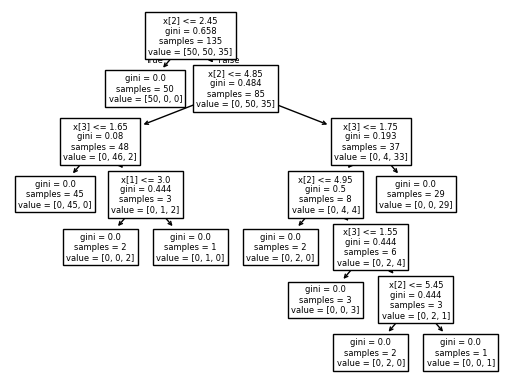

In [7]:
#implementation details at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
tSize=int(X.shape[0]*0.9)
print(tSize)
X_train=X[0:tSize,:]
y_train=y[0:tSize]

X_test=X[tSize:,:]
y_test=y[tSize:]

clf = tree.DecisionTreeClassifier()

#train decision tree on training set
clf = clf.fit(X_train, y_train)

#predict values on testing set
y_pred=clf.predict(X_test);



tree.plot_tree(clf) 
#!pip install graphviz

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix results:")
print(confusion_matrix(y_test,y_pred))

print("Classification report")
print(classification_report(y_test, y_pred))